In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Displaying df with all columns available 
pd.set_option("display.max_columns",None,"display.max_rows",None)

In [9]:
data_df = pd.read_csv("../Data/Team_Stats/2000-2019_cleaned_data5.csv")
data_df

Year  Rk_Off                  Team  Win  Loss  Games  PF_Off  \
0    2000       1        St. Louis Rams   10     6     16     540   
1    2000       2        Denver Broncos   11     5     16     485   
2    2000       3       Oakland Raiders   12     4     16     479   
3    2000       4    Indianapolis Colts   10     6     16     429   
4    2000       5     Minnesota Vikings   11     5     16     397   
5    2000       6  Tampa Bay Buccaneers   10     6     16     388   
6    2000       7   San Francisco 49ers    6    10     16     388   
7    2000       8  Jacksonville Jaguars    7     9     16     367   
8    2000       9    Kansas City Chiefs    7     9     16     355   
9    2000      10    New Orleans Saints   10     6     16     354   
10   2000      11     Green Bay Packers    9     7     16     353   
11   2000      12   Philadelphia Eagles   11     5     16     351   
12   2000      13      Tennessee Titans   13     3     16     346   
13   2000      14      Baltimore Ravens   12     4     16     333   
14   2000      15       New York Giants   12     4     16     328   
15   2000      16        Miami Dolphins   11     5     16     323   
16   2000      17   Pittsburgh Steelers    9     7     16     321   
17   2000      18         New York Jets    9     7     16     321   
18   2000      19      Seattle Seahawks    6    10     16     320   
19   2000      20         Buffalo Bills    8     8     16     315   
20   2000      21     Carolina Panthers    7     9     16     310   
21   2000      22         Detroit Lions    9     7     16     307   
22   2000      23        Dallas Cowboys    5    11     16     294   
23   2000      24   Washington Redskins    8     8     16     281   
24   2000      25  New England Patriots    5    11     16     276   
25   2000      26    San Diego Chargers    1    15     16     269   
26   2000      27       Atlanta Falcons    4    12     16     252   
27   2000      28         Chicago Bears    5    11     16     216   
28   2000      29     Arizona Cardinals    3    13     16     210   
29   2000      30    Cincinnati Bengals    4    12     16     185   
30   2000      31      Cleveland Browns    3    13     16     161   
31   2001       1        St. Louis Rams   14     2     16     503   
32   2001       2    Indianapolis Colts    6    10     16     413   
33   2001       3   San Francisco 49ers   12     4     16     409   
34   2001       4       Oakland Raiders   10     6     16     399   
35   2001       5     Green Bay Packers   12     4     16     390   
36   2001       6  New England Patriots   11     5     16     371   
37   2001       7   Pittsburgh Steelers   13     3     16     352   
38   2001       8        Miami Dolphins   11     5     16     344   
39   2001       9   Philadelphia Eagles   11     5     16     343   
40   2001      10        Denver Broncos    8     8     16     340   
41   2001      11         Chicago Bears   13     3     16     338   
42   2001      12      Tennessee Titans    7     9     16     336   
43   2001      13    New Orleans Saints    7     9     16     333   
44   2001      14    San Diego Chargers    5    11     16     332   
45   2001      15  Tampa Bay Buccaneers    9     7     16     324   
46   2001      16    Kansas City Chiefs    6    10     16     320   
47   2001      17         New York Jets   10     6     16     308   
48   2001      18      Baltimore Ravens   10     6     16     303   
49   2001      19      Seattle Seahawks    9     7     16     301   
50   2001      20     Arizona Cardinals    7     9     16     295   
51   2001      21       New York Giants    7     9     16     294   
52   2001      22  Jacksonville Jaguars    6    10     16     294   
53   2001      23       Atlanta Falcons    7     9     16     291   
54   2001      24     Minnesota Vikings    5    11     16     290   
55   2001      25      Cleveland Browns    7     9     16     285   
56   2001      26         Detroit Lions    2    14     16     270   
57 

# EDA / Preprocessing

In [10]:
data_df.isna().sum()

Year                  0
Rk_Off                0
Team                  0
Win                   0
Loss                  0
Games                 0
PF_Off                0
Total Yds_Off         0
Plays_Off             0
Y/P_Off               0
TO_Off                0
FL_Off                0
1stD_Off              0
Cmp_Off               0
Pass Att_Off          0
Pass Yds_Off          0
Pass TD_Off           0
Int_Off               0
Pass NY/A_Off         0
Pass 1stD_Off         0
Rush Att_Off          0
Rush Yds_Off          0
Rush TD_Off           0
Rush Y/A_Off          0
Rush 1stD_Off         0
Pen_Off               0
Pen Yds_Off           0
1stPy_Off             0
Sc%_Off               0
TO%_Off               0
EXP_Off               0
Rk_Def                0
PF_Def                0
Total Yds_Def         0
Ply_Def               0
Y/P_Def               0
TO_Def                0
FL_Def                0
Total 1stD_Def        0
Cmp_Def               0
Pass Att_Def          0
Pass Yds_Def    

In [11]:
targets = data_df.loc[:,"NY_Win/Loss_Pct"].values
targets


array([0.875 , 0.5   , 0.625 , 0.375 , 0.3125, 0.5625, 0.75  , 0.375 ,
       0.375 , 0.4375, 0.75  , 0.6875, 0.4375, 0.625 , 0.4375, 0.6875,
       0.8125, 0.625 , 0.5625, 0.1875, 0.0625, 0.125 , 0.3125, 0.5   ,
       0.6875, 0.3125, 0.4375, 0.8125, 0.4375, 0.375 , 0.4375, 0.4375,
       0.625 , 0.625 , 0.6875, 0.75  , 0.5625, 0.625 , 0.5625, 0.75  ,
       0.5625, 0.25  , 0.6875, 0.5625, 0.5   , 0.75  , 0.5   , 0.5625,
       0.4375, 0.4375, 0.3125, 0.625 , 0.375 , 0.5625, 0.375 , 0.5625,
       0.1875, 0.5   , 0.4375, 0.4375, 0.3125, 0.125 , 0.8125, 0.25  ,
       0.5   , 0.75  , 0.3125, 0.625 , 0.625 , 0.375 , 0.5625, 0.875 ,
       0.375 , 0.625 , 0.4375, 0.75  , 0.375 , 0.625 , 0.75  , 0.4375,
       0.3125, 0.25  , 0.3125, 0.25  , 0.625 , 0.75  , 0.3125, 0.3125,
       0.4375, 0.5   , 0.25  , 0.6875, 0.625 , 0.3125, 0.4375, 0.5   ,
       0.75  , 0.625 , 0.3125, 0.5   , 0.5625, 0.5625, 0.125 , 0.625 ,
       0.8125, 0.875 , 0.5   , 0.5   , 0.4375, 0.75  , 0.25  , 0.3125,
      

Text(0.5, 1.015, 'Distribution of Next-year wins/loss ratio')

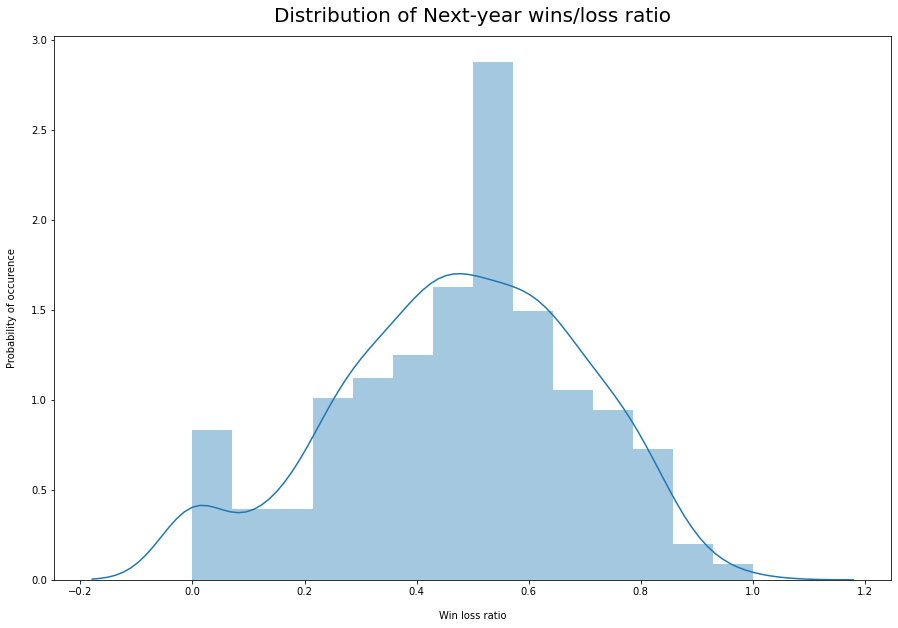

In [129]:
# Visualize distribution of data
plt.figure(figsize=(15,10)) 
sns.distplot(targets)
plt.xlabel("Win loss ratio", labelpad=14)
plt.ylabel("Probability of occurence", labelpad=14)
plt.title("Distribution of Next-year wins/loss ratio", y=1.015, fontsize=20)

In [115]:
# inputs = data_df[["Rk_Off", "Total Yds_Off", "Plays_Off","Y/P_Off",
#  "1stD_Off","Pass Att_Off","Pass TD_Off", "Pass NY/A_Off",
# "Pen Yds_Off","Total Yds_Def", "Ply_Def","Y/P_Def",
# "FL_Def","Total 1stD_Def","Pass Yds_Def","Pass TD_Def",
# "Rush TD_Def"]]
# inputs = data_df.drop(columns=["Team" , "Year", "Win", "Loss", "Games","Win/Loss_Pct"])

inputs = data_df.drop(columns=["Year","Team","Win","Loss","Win/Loss_Pct","Games","NY_Win/Loss_Pct","NY_Win","NY_Loss"])
# inputs = data_df[['EXP_Def','Rush 1stD_Off','1stPy_Def','Pass Yds_Def','Rush Yds_Def',"PT_Wins"]]
feature_names = inputs.columns
inputs




Rk_Off  PF_Off  Total Yds_Off  Plays_Off  Y/P_Off  TO_Off  FL_Off  \
0         1     540           7075       1014      7.0      35      12   
1         2     485           6554       1115      5.9      25      13   
2         3     479           5776       1023      5.6      20       9   
3         4     429           6141       1026      6.0      29      14   
4         5     397           5961        958      6.2      28      10   
5         6     388           4649        961      4.8      24      11   
6         7     388           6040       1024      5.9      19       9   
7         8     367           5690       1080      5.3      29      14   
8         9     355           5614        999      5.6      26      11   
9        10     354           5397       1041      5.2      26      11   
10       11     353           5321       1038      5.1      33      17   
11       12     351           5006       1017      4.9      29      14   
12       13     346           5350       1036      5.2      30      14   
13       14     333           5014       1058      4.7      26       7   
14       15     328           5376       1064      5.1      24      11   
15       16     323           4461        945      4.7      26       9   
16       17     321           4766       1009      4.7      21      11   
17       18     321           5395       1075      5.0      40      11   
18       19     320           4680        956      4.9      38      17   
19       20     315           5498       1080      5.1      23      13   
20       21     310           4654        998      4.7      35      16   
21       22     307           4422       1004      4.4      31      12   
22       23     294           4475        943      4.7      39      18   
23       24     281           5396       1038      5.2      33      12   
24       25     276           4571       1037      4.4      25      10   
25       26     269           4300        982      4.4      50      20   
26       27     252           3994        925      4.3      34      14   
27       28     216           4541        993      4.6      29      13   
28       29     210           4528        932      4.9      44      20   
29       30     185           4260       1001      4.3      35      21   
30       31     161           3530        859      4.1      28       9   
31        1     503           6690       1007      6.6      44      22   
32        2     413           5955       1025      5.8      38      15   
33        3     409           5689       1041      5.5      19       7   
34        4     399           5361       1030      5.2      25      16   
35        5     390           5463        942      5.8      27      12   
36        6     371           4882       1001      4.9      28      13   
37        7     352           5887       1065      5.5      21       9   
38        8     344           4821        953      5.1      38      19   
39        9     343           4923        974      5.1      24      10   
40       10     340           4817       1034      4.7      27       8   
41       11     338           4694       1020      4.6      24       8   
42       12     336           5352       1026      5.2      28      11   
43       13     333           5226       1031      5.1      35      13   
44       14     332           5200       1010      5.1      29      11   
45       15     324           4694       1046      4.5      22      10   
46       16     320           5673       1015      5.6      33       9   
47       17     308           4795        928      5.2      21       7   
48       18     303           5124       1080      4.7      36      16   
49       19     301           4772        980      4.9      21       9   
50       20     295           4898        955      5.1      27      13   
51       21     294           5335       1028      5.2      29      13   
52       22     294           4840        969      5.0      27      13   
53       

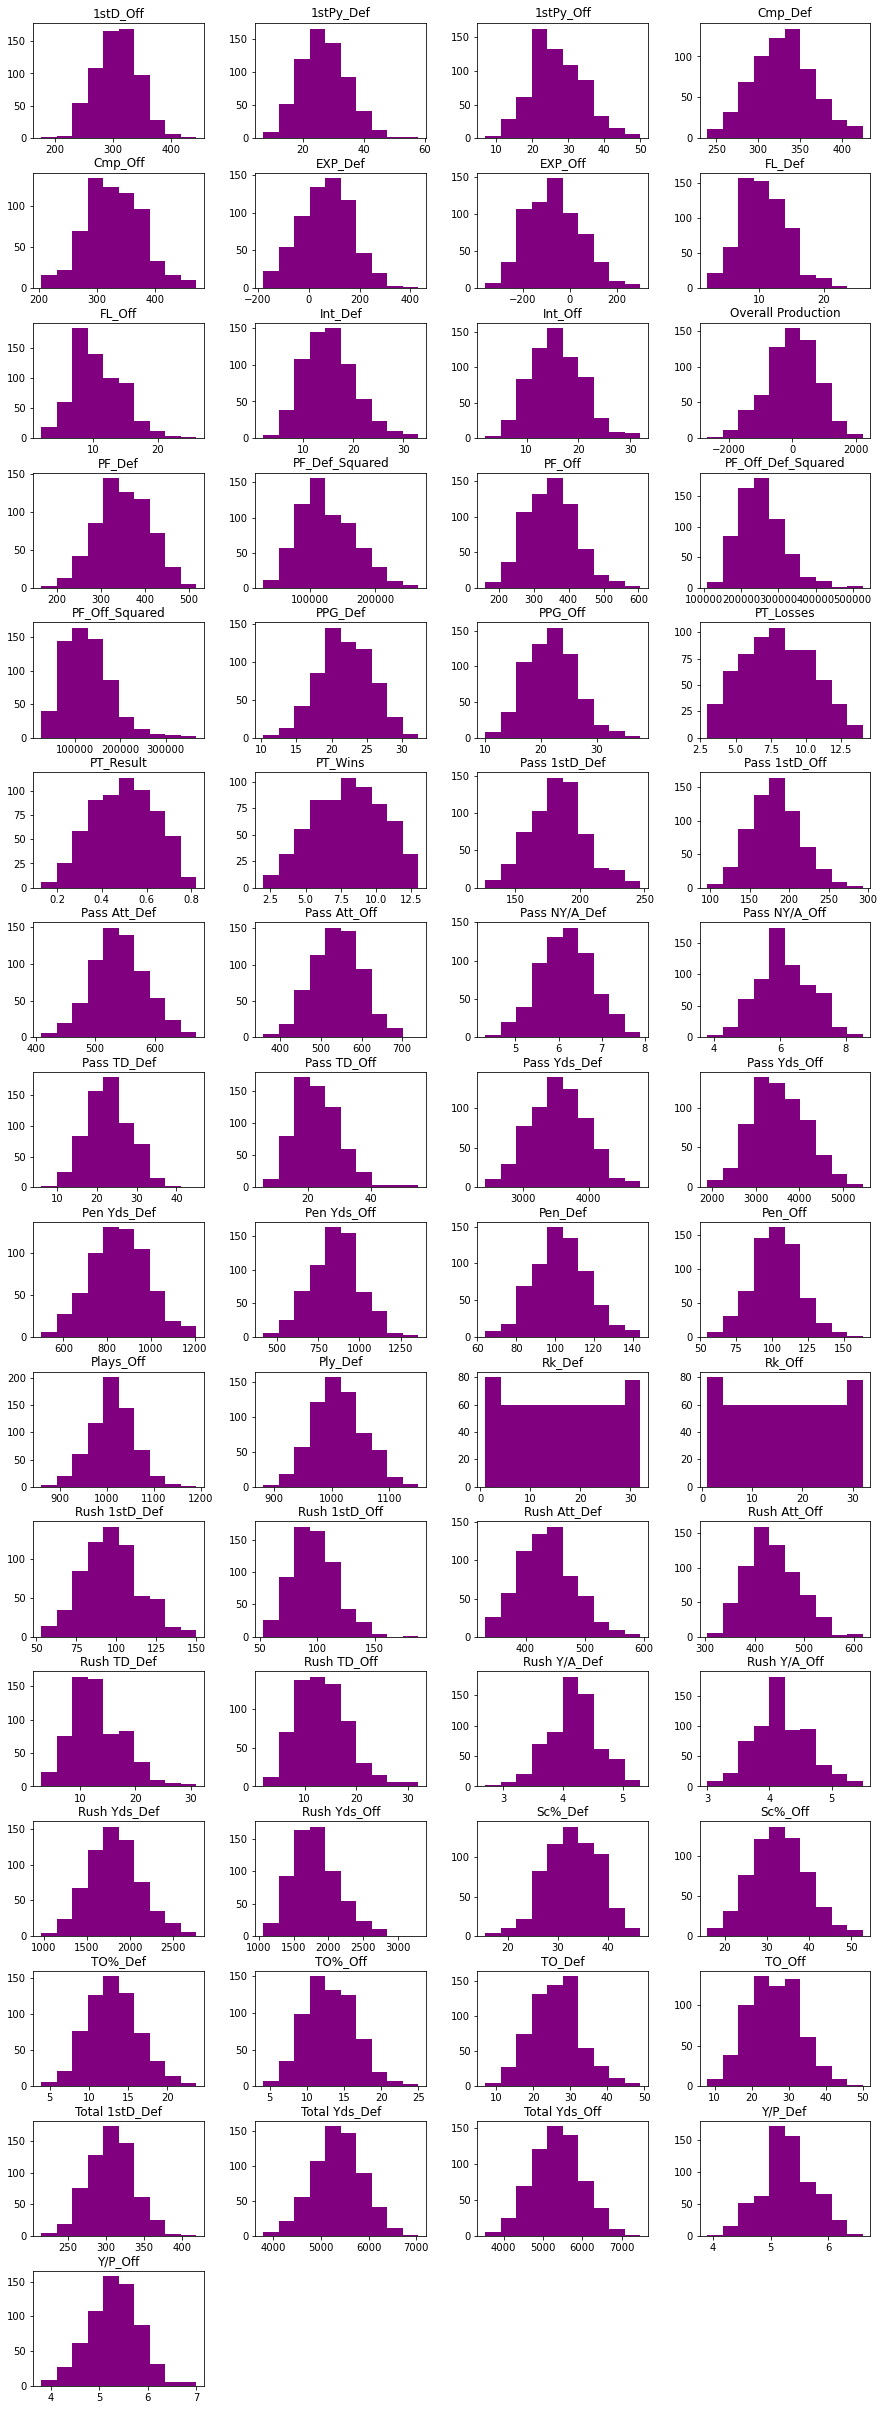

In [116]:
inputs.hist(figsize=(15, 60), color="purple", grid=False, sharex=False, sharey=False, layout=(22,4))
plt.show()

In [117]:
sc = StandardScaler()
scaled_inputs = sc.fit_transform(inputs)

In [118]:
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets, random_state=0)

In [119]:
x_train

array([[-1.35244188,  1.01924799,  1.09902825, ...,  0.02673173,
         1.35133936, -1.35133936],
       [-0.80935407,  0.86506347,  0.39249402, ..., -0.39769333,
         1.79437868, -1.79437868],
       [ 1.25437963, -1.22343593, -0.94802851, ...,  0.11452176,
        -1.74993586,  1.74993586],
       ...,
       [-1.46105944,  1.07531509,  1.11795327, ...,  0.94924021,
         0.46526073, -0.46526073],
       [ 0.81990938, -0.5225972 ,  0.72210486, ...,  0.31972584,
        -0.86385723,  0.86385723],
       [ 0.168204  , -0.21422816,  0.71421943, ...,  0.06756926,
        -0.42081791,  0.42081791]])

# Linear Regression

In [120]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
regressor.score(x_test, y_test)

-0.05237216093041441

In [104]:
y_pred = regressor.predict(x_test)
pd.DataFrame({"Prediction": y_pred * 16, "Actual":y_test * 16, "Difference": (y_test - y_pred) * 16})

Prediction  Actual  Difference
0      6.484499     6.0   -0.484499
1      7.044868     9.0    1.955132
2      6.719792     4.0   -2.719792
3      6.348499     9.0    2.651501
4      6.407172    12.0    5.592828
5      9.255216     5.0   -4.255216
6      7.049144     2.0   -5.049144
7      9.009331     0.0   -9.009331
8      8.796380     6.0   -2.796380
9      9.087086     7.0   -2.087086
10     8.440499     7.0   -1.440499
11     6.584101    12.0    5.415899
12     7.233518     8.0    0.766482
13     8.538104     4.0   -4.538104
14     6.934444     0.0   -6.934444
15     9.251860    10.0    0.748140
16     5.134671     9.0    3.865329
17     7.477887     5.0   -2.477887
18     5.171880     0.0   -5.171880
19     6.733553     7.0    0.266447
20     5.267514    13.0    7.732486
21     7.762138     7.0   -0.762138
22     7.442296     9.0    1.557704
23     6.450886    11.0    4.549114
24     9.043960    12.0    2.956040
25     6.323690     7.0    0.676310
26     7.534254     9.0    1.465746
27     6.957906     8.0    1.042094
28     8.322895     6.0   -2.322895
29     8.748949    11.0    2.251051
30     5.559694     5.0   -0.559694
31     8.764081    14.0    5.235919
32     6.828757    11.0    4.171243
33     6.479501     1.0   -5.479501
34     6.330302    10.0    3.669698
35     7.189540    10.0    2.810460
36     7.024909     6.0   -1.024909
37     7.756070    11.0    3.243930
38     8.065734     9.0    0.934266
39     7.647665    12.0    4.352335
40     5.813913    12.0    6.186087
41     8.297332    10.0    1.702668
42     7.828163     8.0    0.171837
43     7.111849    12.0    4.888151
44     7.313889    10.0    2.686111
45     5.327445     1.0   -4.327445
46     7.498583     6.0   -1.498583
47     8.950303    10.0    1.049697
48     7.583607    14.0    6.416393
49     9.195490    12.0    2.804510
50     8.030424     6.0   -2.030424
51     8.652851     9.0    0.347149
52     8.250778     8.0   -0.250778
53     5.460782     8.0    2.539218
54     7.731400     6.0   -1.731400
55     9.036615     4.0   -5.036615
56     7.946219    10.0    2.053781
57     6.368915    11.0    4.631085
58     6.776509     6.0   -0.776509
59     8.684483     9.0    0.315517
60     9.332775     7.0   -2.332775
61    10.360618    11.0    0.639382
62     7.475145     4.0   -3.475145
63     7.298297     9.0    1.701703
64     5.397962     7.0    1.602038
65     8.550491     3.0   -5.550491
66     6.654906     6.0   -0.654906
67     5.881070     7.0    1.118930
68     6.915706    11.0    4.084294
69     8.443485     8.0   -0.443485
70     9.420460    10.0    0.579540
71     9.623024     4.0   -5.623024
72     8.045764    13.0    4.954236
73     9.072264     8.0   -1.072264
74     6.063389     8.0    1.936611
75     7.307265    10.0    2.692735
76    10.136382     9.0   -1.136382
77     5.161794     7.0    1.838206
78     9.054088     8.0   -1.054088
79     7.049813     0.0   -7.049813
80     9.510527    16.0    6.489473
81     9.322015    12.0    2.677985
82     8.605734    12.0    3.394266
83     8.988561     9.0    0.011439
84     6.217290     4.0   -2.217290
85     7.648435     6.0   -1.648435
86     6.279966    11.0    4.720034
87     9.161031    12.0    2.838969
88    10.439596     7.0   -3.439596
89     8.713871     2.0   -6.713871
90     7.086894    10.0    2.913106
91     8.237907     7.0   -1.237907
92     6.143469     4.0   -2.143469
93     8.183945     0.0   -8.183945
94     7.455614     6.0   -1.455614
95     6.537701     7.0    0.462299
96     5.420001     8.0    2.579999
97     4.630527     7.0    2.369473
98     7.053446     7.0   -0.053446
99     7.514701     4.0   -3.514701
100    7.319594     6.0   -1.319594
101    4.122782     0.0   -4.122782
102    5.314865     2.0   -3.314865
103    7.194100     9.0    1.805900
104    7.006373     2.0   -5.006373
105   10.621614    10.0   -0.621614
106    7.287987     5.0   -2.287987
107    6.599665    11.0    4.400335
108    6.525853     8.0    1.474147
109    8.725048    11.0    2.274952
110    8.

# Random Forest 

In [127]:
regressor = RandomForestRegressor(n_estimators=500, random_state=0)
regressor.fit(x_train, y_train)
sorted(zip(regressor.feature_importances_, feature_names), reverse=True)


[(0.0756971321635924, 'EXP_Def'),
 (0.06477485631461369, 'PT_Result'),
 (0.033201859642773175, 'EXP_Off'),
 (0.026834285388426492, 'Rush Att_Off'),
 (0.0267524432929434, 'Rk_Off'),
 (0.0242421858875951, '1stPy_Def'),
 (0.02207015785171439, 'Overall Production'),
 (0.02203287064241297, 'TO%_Off'),
 (0.021656581098964307, 'Sc%_Off'),
 (0.021465021194967317, 'Rush 1stD_Off'),
 (0.0211797775285489, '1stPy_Off'),
 (0.02105784893074901, 'Total 1stD_Def'),
 (0.02105775359600645, 'Pen_Off'),
 (0.019997689707896255, 'Plays_Off'),
 (0.019847660108253076, 'PF_Off_Def_Squared'),
 (0.019558924291968656, 'Pen Yds_Def'),
 (0.019228548548117504, 'TO%_Def'),
 (0.019110202073544788, 'Rush Att_Def'),
 (0.01868154969521429, 'FL_Off'),
 (0.018156308268973825, 'Rush 1stD_Def'),
 (0.016852433375285414, 'Rush TD_Def'),
 (0.016842971387793886, 'Cmp_Def'),
 (0.016795093058394536, 'Rush Yds_Def'),
 (0.016281660709679926, 'Pen Yds_Off'),
 (0.01616862354977679, 'Pen_Def'),
 (0.015830254671688387, 'Pass Att_Off'),


In [128]:
regressor.score(x_test, y_test)

0.04317262672052513

In [123]:
y_pred = regressor.predict(x_test)
pd.DataFrame({"Prediction":y_pred * 16, "Actual":y_test * 16, "Difference": (y_test - y_pred) * 16})

Prediction  Actual  Difference
0           6.1     6.0        -0.1
1           6.6     9.0         2.4
2           7.0     4.0        -3.0
3           8.1     9.0         0.9
4           8.2    12.0         3.8
5           6.7     5.0        -1.7
6           7.1     2.0        -5.1
7           9.9     0.0        -9.9
8           8.7     6.0        -2.7
9           5.8     7.0         1.2
10          9.9     7.0        -2.9
11          5.4    12.0         6.6
12          7.6     8.0         0.4
13          7.5     4.0        -3.5
14          6.1     0.0        -6.1
15          7.7    10.0         2.3
16          4.7     9.0         4.3
17          6.3     5.0        -1.3
18          5.9     0.0        -5.9
19          6.7     7.0         0.3
20          4.2    13.0         8.8
21          6.6     7.0         0.4
22          8.9     9.0         0.1
23          4.9    11.0         6.1
24          9.1    12.0         2.9
25          6.4     7.0         0.6
26          5.0     9.0         4.0
27          5.9     8.0         2.1
28          9.1     6.0        -3.1
29          9.3    11.0         1.7
30          5.3     5.0        -0.3
31          8.4    14.0         5.6
32          8.2    11.0         2.8
33          7.6     1.0        -6.6
34          6.5    10.0         3.5
35          6.0    10.0         4.0
36          7.2     6.0        -1.2
37          8.7    11.0         2.3
38          6.2     9.0         2.8
39          9.5    12.0         2.5
40          5.4    12.0         6.6
41          7.9    10.0         2.1
42         10.1     8.0        -2.1
43          6.8    12.0         5.2
44          9.7    10.0         0.3
45          6.6     1.0        -5.6
46          7.2     6.0        -1.2
47          7.6    10.0         2.4
48          8.8    14.0         5.2
49          9.2    12.0         2.8
50         11.2     6.0        -5.2
51          9.8     9.0        -0.8
52          6.5     8.0         1.5
53          6.5     8.0         1.5
54          8.4     6.0        -2.4
55          9.0     4.0        -5.0
56          6.9    10.0         3.1
57          7.7    11.0         3.3
58          7.2     6.0        -1.2
59          7.6     9.0         1.4
60          6.4     7.0         0.6
61          9.2    11.0         1.8
62          6.5     4.0        -2.5
63          6.5     9.0         2.5
64          6.6     7.0         0.4
65          7.0     3.0        -4.0
66          5.6     6.0         0.4
67          6.0     7.0         1.0
68          7.5    11.0         3.5
69          9.3     8.0        -1.3
70          8.1    10.0         1.9
71          7.7     4.0        -3.7
72          5.7    13.0         7.3
73          7.6     8.0         0.4
74          7.9     8.0         0.1
75          6.4    10.0         3.6
76          8.3     9.0         0.7
77          7.8     7.0        -0.8
78          9.0     8.0        -1.0
79          6.4     0.0        -6.4
80          9.2    16.0         6.8
81         10.9    12.0         1.1
82         10.4    12.0         1.6
83          6.6     9.0         2.4
84          6.0     4.0        -2.0
85          9.9     6.0        -3.9
86          7.4    11.0         3.6
87          9.2    12.0         2.8
88         10.3     7.0        -3.3
89          6.8     2.0        -4.8
90          8.6    10.0         1.4
91          9.7     7.0        -2.7
92          5.9     4.0        -1.9
93         10.0     0.0       -10.0
94          8.4     6.0        -2.4
95          5.6     7.0         1.4
96          6.6     8.0         1.4
97          5.8     7.0         1.2
98          7.9     7.0        -0.9
99          8.2     4.0        -4.2
100         8.7     6.0        -2.7
101         4.0     0.0        -4.0
102         4.1     2.0        -2.1
103         6.6     9.0         2.4
104         8.3     2.0        -6.3
105         9.2    10.0         0.8
106         7.5     5.0        -2.5
107         6.2    11.0         4.8
108         7.4     8.0         0.6
109         7.6    11.0         3.4
110      

# Support Vector Regression

In [124]:
regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.04556215672600883

In [109]:
y_pred = regressor.predict(x_test)
pd.DataFrame({"Prediction":y_pred * 16, "Actual":y_test * 16, "Difference": (y_test - y_pred) * 16})

Prediction  Actual  Difference
0      6.307313     6.0   -0.307313
1      9.035166     9.0   -0.035166
2      7.767559     4.0   -3.767559
3      6.784641     9.0    2.215359
4      7.433178    12.0    4.566822
5      8.329819     5.0   -3.329819
6      7.141208     2.0   -5.141208
7      9.971014     0.0   -9.971014
8      7.898694     6.0   -1.898694
9      8.271856     7.0   -1.271856
10     8.470806     7.0   -1.470806
11     4.462227    12.0    7.537773
12     7.285228     8.0    0.714772
13     7.340542     4.0   -3.340542
14     8.966257     0.0   -8.966257
15    10.816575    10.0   -0.816575
16     3.793726     9.0    5.206274
17     6.626512     5.0   -1.626512
18     2.505577     0.0   -2.505577
19     7.956983     7.0   -0.956983
20     6.019092    13.0    6.980908
21     6.706535     7.0    0.293465
22     7.853682     9.0    1.146318
23     5.561256    11.0    5.438744
24     9.510386    12.0    2.489614
25     4.605074     7.0    2.394926
26     7.919035     9.0    1.080965
27     8.045200     8.0   -0.045200
28     7.629461     6.0   -1.629461
29     8.116804    11.0    2.883196
30     4.300454     5.0    0.699546
31     9.178197    14.0    4.821803
32     6.763778    11.0    4.236222
33     7.353154     1.0   -6.353154
34     6.742775    10.0    3.257225
35     6.437595    10.0    3.562405
36     7.265856     6.0   -1.265856
37     7.484742    11.0    3.515258
38     6.901586     9.0    2.098414
39     6.982000    12.0    5.018000
40     3.350474    12.0    8.649526
41    11.494108    10.0   -1.494108
42     9.286590     8.0   -1.286590
43     4.229178    12.0    7.770822
44     6.705590    10.0    3.294410
45     4.005398     1.0   -3.005398
46     9.824548     6.0   -3.824548
47     9.598096    10.0    0.401904
48     9.488823    14.0    4.511177
49    10.979048    12.0    1.020952
50     8.728929     6.0   -2.728929
51     7.601719     9.0    1.398281
52     5.083357     8.0    2.916643
53     6.849258     8.0    1.150742
54     7.867279     6.0   -1.867279
55     8.027470     4.0   -4.027470
56     7.845245    10.0    2.154755
57     5.896966    11.0    5.103034
58     7.042213     6.0   -1.042213
59     6.686659     9.0    2.313341
60     8.921083     7.0   -1.921083
61    10.167688    11.0    0.832312
62     6.081631     4.0   -2.081631
63     7.546336     9.0    1.453664
64     5.427936     7.0    1.572064
65     7.680510     3.0   -4.680510
66     6.757611     6.0   -0.757611
67     6.570813     7.0    0.429187
68     9.896520    11.0    1.103480
69     8.838655     8.0   -0.838655
70     7.552772    10.0    2.447228
71     9.374904     4.0   -5.374904
72     6.599157    13.0    6.400843
73     7.821014     8.0    0.178986
74     6.921646     8.0    1.078354
75     8.027035    10.0    1.972965
76     8.421333     9.0    0.578667
77     4.003917     7.0    2.996083
78     8.608505     8.0   -0.608505
79     6.843930     0.0   -6.843930
80    11.239866    16.0    4.760134
81     8.678442    12.0    3.321558
82     9.100418    12.0    2.899582
83     7.677306     9.0    1.322694
84     6.636096     4.0   -2.636096
85     8.613881     6.0   -2.613881
86     9.557469    11.0    1.442531
87     8.063813    12.0    3.936187
88     8.070079     7.0   -1.070079
89     6.615523     2.0   -4.615523
90     7.956491    10.0    2.043509
91     8.369846     7.0   -1.369846
92     6.596464     4.0   -2.596464
93     8.643882     0.0   -8.643882
94     5.416618     6.0    0.583382
95     3.282196     7.0    3.717804
96     6.702013     8.0    1.297987
97     4.972600     7.0    2.027400
98     8.846381     7.0   -1.846381
99     6.612279     4.0   -2.612279
100    7.884267     6.0   -1.884267
101    3.325942     0.0   -3.325942
102    3.342074     2.0   -1.342074
103    7.013166     9.0    1.986834
104    8.053474     2.0   -6.053474
105   11.612265    10.0   -1.612265
106    7.338446     5.0   -2.338446
107    7.521244    11.0    3.478756
108    7.906695     8.0    0.093305
109    9.080481    11.0    1.919519
110    8.

# Polynomial Linear Regression 

In [110]:
polyReg = PolynomialFeatures(degree = 3)
polyInputs = polyReg.fit_transform(x_train)
regressor = LinearRegression()
regressor.fit(polyInputs,y_train)
regressor.score(polyReg.transform(x_test),y_test)

-0.08129322224179214

In [111]:
y_pred = regressor.predict(polyReg.transform(x_test))
pd.DataFrame({"Prediction":y_pred * 16, "Actual":y_test * 16, "Difference": (y_test - y_pred) * 16})

Prediction  Actual  Difference
0      7.206470     6.0   -1.206470
1      7.649851     9.0    1.350149
2      7.992483     4.0   -3.992483
3      5.864555     9.0    3.135445
4      6.909846    12.0    5.090154
5      8.981055     5.0   -3.981055
6      7.467169     2.0   -5.467169
7      9.158670     0.0   -9.158670
8      8.315731     6.0   -2.315731
9      7.943324     7.0   -0.943324
10    10.131010     7.0   -3.131010
11     8.058296    12.0    3.941704
12     7.362170     8.0    0.637830
13     8.970251     4.0   -4.970251
14     7.715352     0.0   -7.715352
15     8.925820    10.0    1.074180
16     4.285110     9.0    4.714890
17     6.414991     5.0   -1.414991
18     4.456921     0.0   -4.456921
19     7.953831     7.0   -0.953831
20     3.811379    13.0    9.188621
21     8.152214     7.0   -1.152214
22     6.669979     9.0    2.330021
23     5.487384    11.0    5.512616
24    10.627876    12.0    1.372124
25     1.200738     7.0    5.799262
26     9.576408     9.0   -0.576408
27     8.604563     8.0   -0.604563
28     8.041598     6.0   -2.041598
29     6.983802    11.0    4.016198
30     5.131177     5.0   -0.131177
31    10.501340    14.0    3.498660
32     8.003164    11.0    2.996836
33     9.404081     1.0   -8.404081
34     8.607105    10.0    1.392895
35     7.403200    10.0    2.596800
36     7.888685     6.0   -1.888685
37    10.595233    11.0    0.404767
38     7.143757     9.0    1.856243
39     8.591056    12.0    3.408944
40     3.241001    12.0    8.758999
41     9.035941    10.0    0.964059
42     8.787050     8.0   -0.787050
43     4.536708    12.0    7.463292
44     7.494453    10.0    2.505547
45     4.874679     1.0   -3.874679
46     8.364676     6.0   -2.364676
47    10.441089    10.0   -0.441089
48    11.006788    14.0    2.993212
49    15.419227    12.0   -3.419227
50     9.290123     6.0   -3.290123
51     9.207365     9.0   -0.207365
52     6.972047     8.0    1.027953
53     7.068729     8.0    0.931271
54     8.812866     6.0   -2.812866
55     8.289941     4.0   -4.289941
56     7.046229    10.0    2.953771
57     6.727833    11.0    4.272167
58     7.220644     6.0   -1.220644
59     9.389150     9.0   -0.389150
60     9.120836     7.0   -2.120836
61    10.057767    11.0    0.942233
62     5.898761     4.0   -1.898761
63     5.519282     9.0    3.480718
64     3.404472     7.0    3.595528
65     8.080607     3.0   -5.080607
66     7.288999     6.0   -1.288999
67     6.151668     7.0    0.848332
68     5.921319    11.0    5.078681
69     9.349270     8.0   -1.349270
70    10.611252    10.0   -0.611252
71     8.469204     4.0   -4.469204
72     9.797105    13.0    3.202895
73     8.098498     8.0   -0.098498
74     6.510227     8.0    1.489773
75     7.715009    10.0    2.284991
76     9.520966     9.0   -0.520966
77     6.750960     7.0    0.249040
78    10.243706     8.0   -2.243706
79     8.321206     0.0   -8.321206
80    10.447023    16.0    5.552977
81     9.057446    12.0    2.942554
82     7.821931    12.0    4.178069
83     8.214788     9.0    0.785212
84     7.418712     4.0   -3.418712
85     8.203477     6.0   -2.203477
86    10.986134    11.0    0.013866
87     8.869741    12.0    3.130259
88     9.159800     7.0   -2.159800
89     8.183550     2.0   -6.183550
90     7.646377    10.0    2.353623
91     8.798524     7.0   -1.798524
92     6.653341     4.0   -2.653341
93     9.873916     0.0   -9.873916
94     7.743122     6.0   -1.743122
95     0.332318     7.0    6.667682
96     4.617349     8.0    3.382651
97     4.998448     7.0    2.001552
98     8.912116     7.0   -1.912116
99     6.260305     4.0   -2.260305
100    7.100513     6.0   -1.100513
101    1.998455     0.0   -1.998455
102    4.358910     2.0   -2.358910
103    6.927905     9.0    2.072095
104    6.584956     2.0   -4.584956
105   11.105951    10.0   -1.105951
106    7.989155     5.0   -2.989155
107    5.459739    11.0    5.540261
108    7.913417     8.0    0.086583
109    9.119856    11.0    1.880144
110   10.

Text(0.5, 1.0, 'Multi-Collinearity of Football Stats')

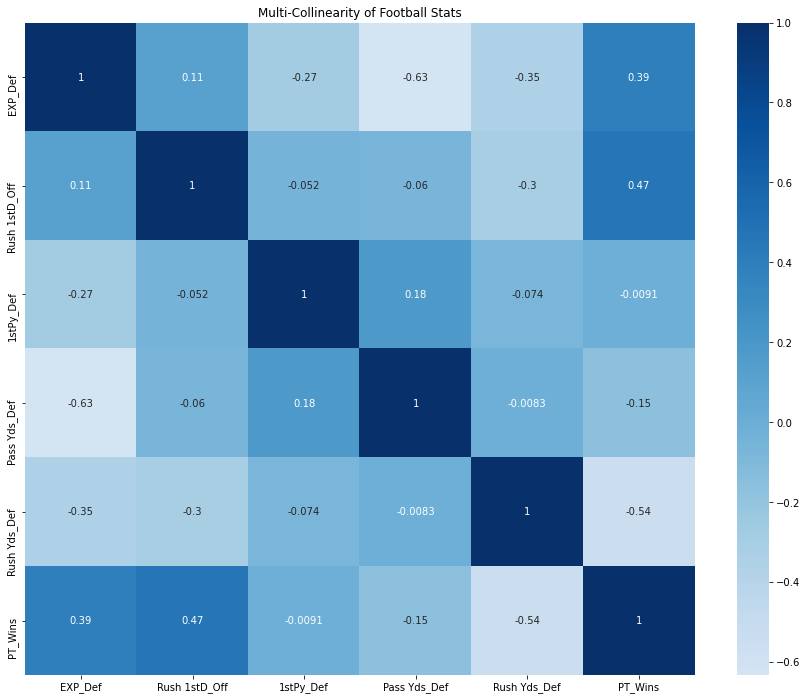

In [112]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(inputs.corr(), center=0, cmap="Blues",annot=True)
ax.set_title("Multi-Collinearity of Football Stats")